In [1]:
#libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/y3/8t9j98gs2hx7slww07_ldb1w0000gn/T/ipykernel_71449/687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#importing csv file 
manga_df = pd.read_csv('best-selling-manga.csv')

In [50]:
#displaying first 5 rows 
manga_df.head()

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71


In [51]:
#observing the data types in each column 
manga_df.dtypes

Manga series                               object
Author(s)                                  object
Publisher                                  object
Demographic                                object
No. of collected volumes                    int64
Serialized                                 object
Approximate sales in million(s)           float64
Average sales per volume in million(s)    float64
dtype: object

In [9]:
#Statistics on the dataset as a whole 
manga_df.describe()

,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
count,187.000000,187.000000,187.000000
mean,46.048128,50.764332,1.377380
std,34.678288,57.178028,1.240013
min,5.000000,20.000000,0.190000
25%,23.500000,24.500000,0.670000
50%,34.000000,31.000000,1.030000
75%,56.500000,50.500000,1.650000
max,207.000000,516.600000,10.000000


In [11]:
#Isolating the average sales of the data set into 1 variable 
average_sales = manga_df['Approximate sales in million(s)'].mean()
average_sales

50.76433155080214

In [8]:
#Finding the highest selling manga of all time and displaying the corresponding rows 
best_selling = manga_df.loc[manga_df['Approximate sales in million(s)'].idxmax()]
best_selling 

Manga series                                 One Piece
Author(s)                                 Eiichiro Oda
Publisher                                     Shueisha
Demographic                                     Shōnen
No. of collected volumes                           104
Serialized                                1997–present
Approximate sales in million(s)                  516.6
Average sales per volume in million(s)            4.97
Name: 0, dtype: object

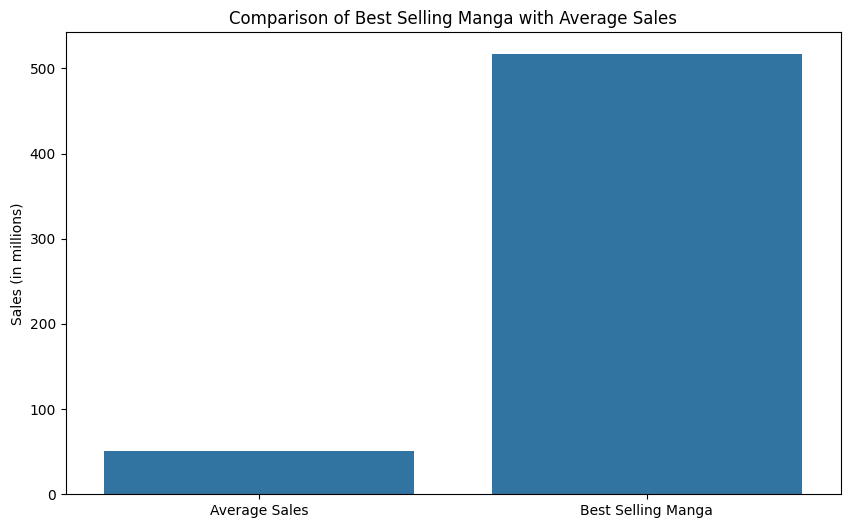

In [18]:
#Creating a visual to compare the highest selling manga of all time and comparing it to the industry average 
plt.figure(figsize=(10, 6))
sns.barplot(x=['Average Sales', 'Best Selling Manga'], y=[average_sales, best_selling['Approximate sales in million(s)']])
plt.title('Comparison of Best Selling Manga with Average Sales')
plt.ylabel('Sales (in millions)')
plt.show()

In [20]:
#Amount of total dataset that each publiusher has (Below is the code to display these as percentages)
#series_total = manga_df['Publisher'].value_counts(normalize=True)


series_total = manga_df['Publisher'].value_counts()
series_total

Publisher
Shueisha                                     65
Kodansha                                     50
Shogakukan                                   32
Akita Shoten                                 11
Hakusensha                                    7
Nihon Bungeisha                               3
Futabasha                                     2
Shōnen Gahōsha                                2
Square Enix                                   2
Kadokawa Shoten                               2
Ushio Shuppansha                              1
Enix (2001–2003), Square Enix (2003–2010)     1
Kobunsha                                      1
Jitsugyo no Nihon Sha                         1
Shueisha/Kodansha                             1
Shinchosha, Tokuma Shoten                     1
Square Enix, Ichijinsha                       1
Gakken                                        1
Enix                                          1
Ushio Shuppan                                 1
Shueisha/Shogakukan/Leed      

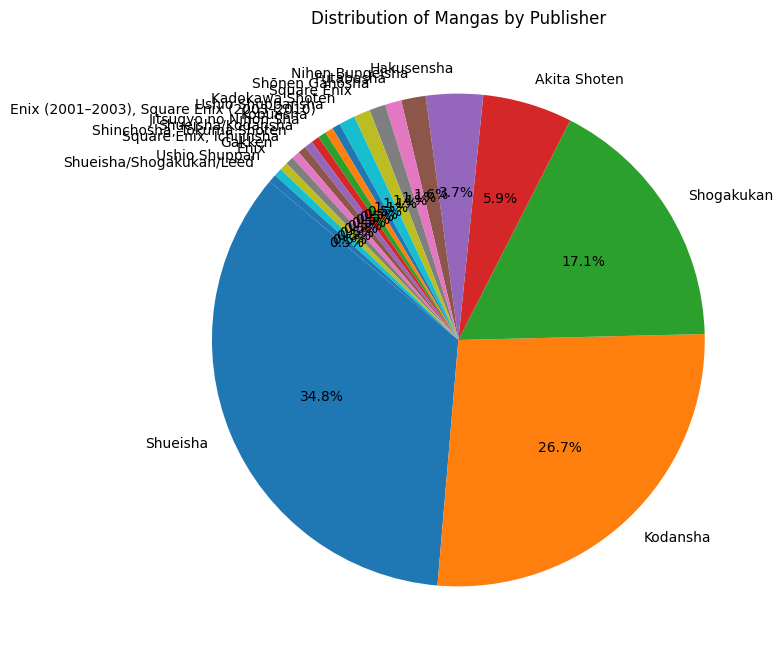

In [52]:
#visual to display the top three publishers in the dataset and to gain perspective of how much of the dataset they contribute 
plt.figure(figsize=(8, 8))
plt.pie(series_total, labels=series_total.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Mangas by Publisher')
plt.show()

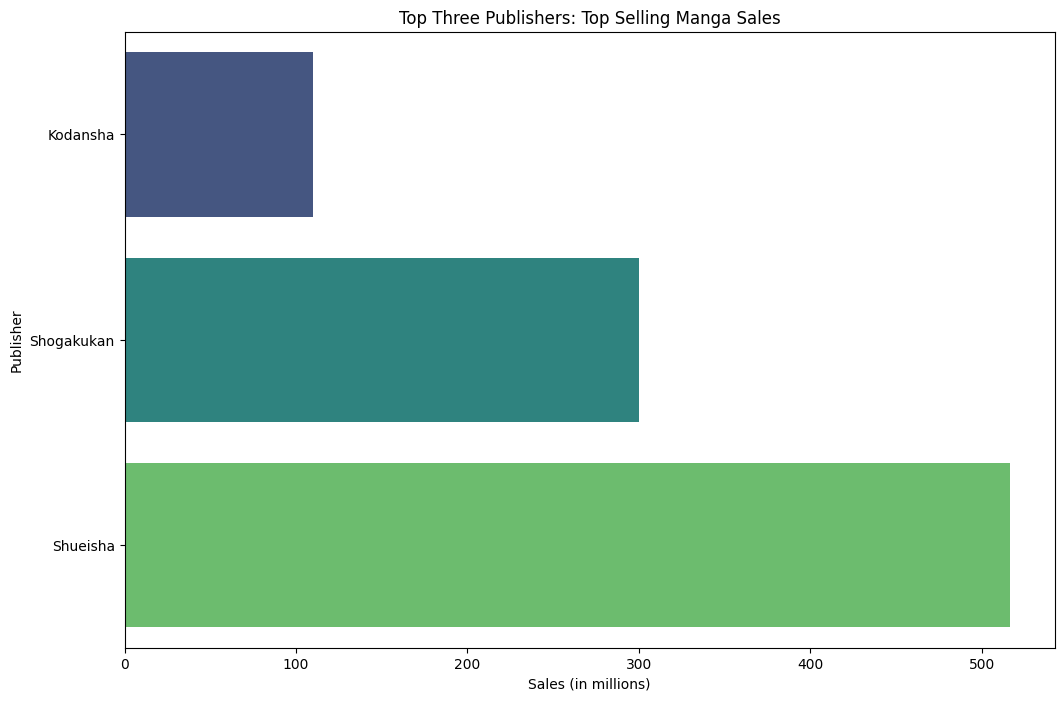

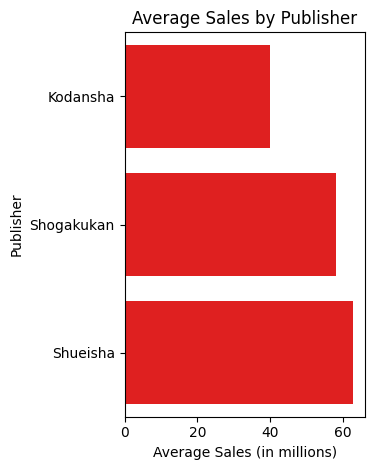

In [41]:
#Identifying the top three publishers based on sales 
top_publishers = manga_df.groupby('Publisher')['Approximate sales in million(s)'].sum().nlargest(3).index

#Creating a dataframe for the top three
top_publishers_data = manga_df[manga_df['Publisher'].isin(top_publishers)]

#Calculating the average sales for the top 3 
average_sales_by_publisher = top_publishers_data.groupby('Publisher')['Approximate sales in million(s)'].mean()

#Finding the top selling manga for each publisher 
top_selling_manga_by_publisher = top_publishers_data.loc[top_publishers_data.groupby('Publisher')['Approximate sales in million(s)'].idxmax()]

#Merge the data for visualization 
visualization_data = pd.merge(top_selling_manga_by_publisher[['Publisher', 'Manga series', 'Approximate sales in million(s)']],
                              average_sales_by_publisher.reset_index(name='Average Sales'),
                              on='Publisher')

#Plot the data to compare top selling mangas 
plt.figure(figsize=(12, 8))
sns.barplot(x='Approximate sales in million(s)', y='Publisher', hue='Publisher', data=visualization_data, palette='viridis', dodge=False, label='Top Selling Manga')
plt.title('Top Three Publishers: Top Selling Manga Sales')
plt.xlabel('Sales (in millions)')
plt.ylabel('Publisher')
plt.show()

#Plot the data to compare their averages 
plt.subplot(1, 2, 2)
sns.barplot(x='Average Sales', y='Publisher', data=visualization_data, color='red')
plt.title('Average Sales by Publisher')
plt.xlabel('Average Sales (in millions)')
plt.ylabel('Publisher')

plt.tight_layout()
plt.show()

In [22]:
#shueisha data 
shueisha = manga_df.loc[manga_df['Publisher'] == 'Shueisha']
shueisha.describe()

,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
count,65.000000,65.000000,65.000000
mean,38.015385,62.816923,1.750462
std,31.095866,76.129262,1.326020
min,8.000000,20.000000,0.540000
25%,22.000000,25.000000,0.890000
50%,30.000000,35.000000,1.220000
75%,38.000000,70.000000,2.290000
max,201.000000,516.600000,6.520000


In [53]:
#kodansha data 
kodansha = manga_df.loc[manga_df['Publisher'] == 'Kodansha']
kodansha.describe()


,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
count,50.000000,50.000000,50.000000
mean,45.020000,39.886600,1.288000
std,30.862096,22.834071,1.427295
min,5.000000,20.000000,0.240000
25%,25.250000,25.000000,0.592500
50%,37.500000,31.500000,0.915000
75%,50.750000,46.750000,1.525000
max,163.000000,110.000000,10.000000


In [54]:
#shogakukan data
shogakukan = manga_df.loc[manga_df['Publisher'] == 'Shogakukan']
shogakukan.describe()


,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
count,32.000000,32.000000,32.000000
mean,52.500000,57.984375,1.178438
std,41.547485,74.835243,0.989490
min,12.000000,20.000000,0.200000
25%,27.500000,20.800000,0.587500
50%,35.500000,27.000000,0.960000
75%,60.250000,51.250000,1.442500
max,207.000000,300.000000,4.710000


In [55]:
#sorting the manga series by date

sort_by_date = manga_df.sort_values('Serialized', ascending=True)
sort_by_date

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
20,Sazae-san,Machiko Hasegawa,Kodansha,—,45,1946–1974,86.0,1.91
13,Astro Boy,Osamu Tezuka,Kobunsha,Shōnen,23,1952–1968,100.0,4.35
121,Ashita no Joe,"Ikki Kajiwara, Tetsuya Chiba",Kodansha,Shōnen,20,1968–1973,25.0,1.25
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71
...,...,...,...,...,...,...,...,...
32,Tokyo Revengers,Ken Wakui,Kodansha,Shōnen,31,2017–2022,70.0,2.26
31,Jujutsu Kaisen,Gege Akutami,Shueisha,Shōnen,22,2018–present,70.0,3.18
141,Chainsaw Man,Tatsuki Fujimoto,Shueisha,Shōnen,14,2018–present,24.0,1.71
118,Blue Lock,"Muneyuki Kaneshiro, Yusuke Nomura",Kodansha,Shōnen,24,2018–present,26.0,1.08


In [45]:
#Manga Series before 2000
before_2000 = manga_df['Serialized'] <= '2000'
old_school = manga_df[before_2000]
old_school_avg_sales = old_school['Approximate sales in million(s)'].mean()
                     

In [56]:
#Confirming the whole dataset was used 
before_2000.value_counts()

Serialized
True     132
False     55
Name: count, dtype: int64

In [58]:
#stats on the data on mangas created before 2000
old_school.describe()

,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
count,132.000000,132.000000,132.000000
mean,49.257576,55.247197,1.420379
std,38.969282,65.076936,1.311292
min,5.000000,20.000000,0.190000
25%,23.000000,25.000000,0.732500
50%,34.500000,34.165000,1.065000
75%,62.000000,55.000000,1.645000
max,207.000000,516.600000,10.000000


In [47]:
#Manga series after 2000
after_2000 = manga_df['Serialized'] >= '2000'
new_school = manga_df[after_2000]
new_school_avg_sales = new_school['Approximate sales in million(s)'].mean()
new_school_avg_sales

40.00545454545455

In [57]:
#Confirming the whole dataset was used 
after_2000.value_counts()

Serialized
False    132
True      55
Name: count, dtype: int64

In [59]:
#stats on the manga series created after 2000
new_school.describe()

,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
count,55.000000,55.000000,55.000000
mean,38.345455,40.005455,1.274182
std,19.302867,28.638775,1.053364
min,11.000000,20.000000,0.290000
25%,26.000000,23.900000,0.580000
50%,33.000000,30.000000,1.000000
75%,45.500000,40.500000,1.625000
max,105.000000,150.000000,6.520000


/var/folders/y3/8t9j98gs2hx7slww07_ldb1w0000gn/T/ipykernel_71449/594275204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Old School Manga Series', 'New School Manga Series'], y=[old_school_avg_sales, new_school_avg_sales], palette='pastel')


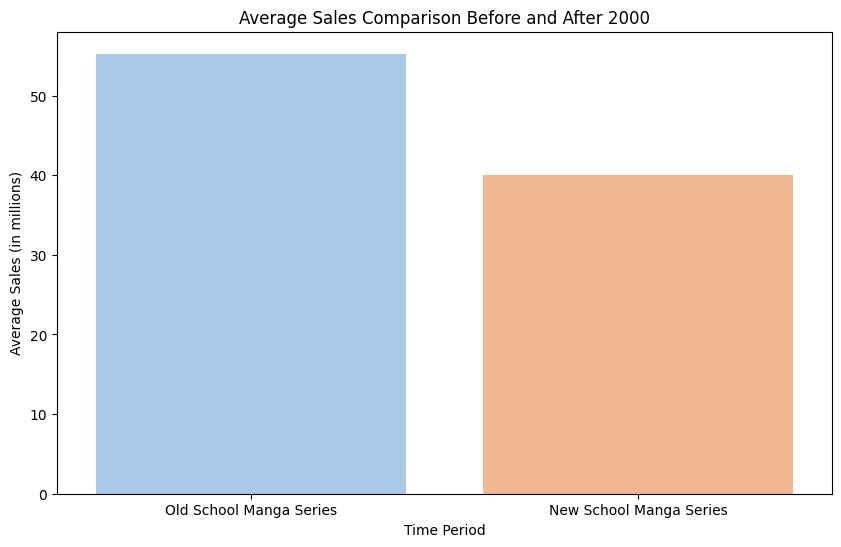

In [60]:
#Creating a visual to compare the average sales of new school vs old school
plt.figure(figsize=(10, 6))
sns.barplot(x=['Old School Manga Series', 'New School Manga Series'], y=[old_school_avg_sales, new_school_avg_sales], palette='pastel')
plt.title('Average Sales Comparison Before and After 2000')
plt.xlabel('Time Period')
plt.ylabel('Average Sales (in millions)')
plt.show()